# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import urllib

# Import API key
api_keys = "8c90c9c2480fc6bc373572dbc4997424"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [16]:
#https://samples.openweathermap.org/data/2.5/weather?q=London,uk&appid=b6907d289e10d714a6e88b30761fae22

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_keys
city_data = []

for i, city in enumerate(cities):
    siteurl = url + "&q=" + urllib.request.pathname2url(city)
    weather = requests.get(siteurl).json()
    print(city)
    print(weather)
    print(siteurl)
    try:
        weather
        city_lat = weather["coord"]["lat"]
        city_lng = weather["coord"]["lon"]
        city_max_temp = weather["main"]["temp_max"]
        city_humidity = weather["main"]["humidity"]
        city_clouds = weather["clouds"]["all"]
        city_wind = weather["wind"]["speed"]
        city_country = weather["sys"]["country"]
        city_date = weather["dt"]
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    except:
        pass

hanzhong
{'coord': {'lon': 107.03, 'lat': 33.08}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 30.93, 'pressure': 924.94, 'humidity': 81, 'temp_min': 30.93, 'temp_max': 30.93, 'sea_level': 1039.16, 'grnd_level': 924.94}, 'wind': {'speed': 2.24, 'deg': 284}, 'clouds': {'all': 56}, 'dt': 1548351041, 'sys': {'message': 0.0036, 'country': 'CN', 'sunrise': 1548287516, 'sunset': 1548324983}, 'id': 1808857, 'name': 'Hanzhong', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8c90c9c2480fc6bc373572dbc4997424&q=hanzhong
xining
{'coord': {'lon': 101.77, 'lat': 36.62}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 8.56, 'pressure': 748.23, 'humidity': 64, 'temp_min': 8.56, 'temp_max': 8.56, 'sea_level': 1052.17, 'grnd_level': 748.23}, 'wind': {'speed': 2.35, 'deg': 99.0001}, 'clouds': {'all': 76}, 'dt': 

mildura
{'coord': {'lon': 142.16, 'lat': -34.18}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 87.8, 'pressure': 1003, 'humidity': 27, 'temp_min': 87.8, 'temp_max': 87.8}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 30}, 'clouds': {'all': 0}, 'dt': 1548349200, 'sys': {'type': 1, 'id': 9550, 'message': 0.0038, 'country': 'AU', 'sunrise': 1548272658, 'sunset': 1548322931}, 'id': 2157698, 'name': 'Mildura', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8c90c9c2480fc6bc373572dbc4997424&q=mildura
inirida
{'coord': {'lon': -67.92, 'lat': 3.87}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 88.08, 'pressure': 1006.33, 'humidity': 60, 'temp_min': 88.08, 'temp_max': 88.08, 'sea_level': 1024.53, 'grnd_level': 1006.33}, 'wind': {'speed': 2.68, 'deg': 182.5}, 'clouds': {'all': 36}, 'dt': 15483510

khatanga
{'coord': {'lon': 102.47, 'lat': 71.98}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -26.95, 'pressure': 1033.73, 'humidity': 42, 'temp_min': -26.95, 'temp_max': -26.95, 'sea_level': 1039.12, 'grnd_level': 1033.73}, 'wind': {'speed': 8.16, 'deg': 232}, 'clouds': {'all': 56}, 'dt': 1548351063, 'sys': {'message': 0.0032, 'country': 'RU', 'sunrise': 0, 'sunset': 0}, 'id': 2022572, 'name': 'Khatanga', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8c90c9c2480fc6bc373572dbc4997424&q=khatanga
busselton
{'coord': {'lon': 115.35, 'lat': -33.64}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 58.2, 'pressure': 1028.86, 'humidity': 100, 'temp_min': 58.2, 'temp_max': 58.2, 'sea_level': 1029.96, 'grnd_level': 1028.86}, 'wind': {'speed': 8.39, 'deg': 156.5}, 'clouds': {'all': 8}, 'dt': 1548351063, 's

maumere
{'coord': {'lon': 122.22, 'lat': -8.63}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 79.57, 'pressure': 1010.78, 'humidity': 100, 'temp_min': 79.57, 'temp_max': 79.57, 'sea_level': 1020.03, 'grnd_level': 1010.78}, 'wind': {'speed': 24.49, 'deg': 295}, 'rain': {'3h': 1.2625}, 'clouds': {'all': 88}, 'dt': 1548351066, 'sys': {'message': 0.0038, 'country': 'ID', 'sunrise': 1548280050, 'sunset': 1548325133}, 'id': 1635815, 'name': 'Maumere', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8c90c9c2480fc6bc373572dbc4997424&q=maumere
paamiut
{'coord': {'lon': -49.67, 'lat': 61.99}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 24.67, 'pressure': 1026.11, 'humidity': 100, 'temp_min': 24.67, 'temp_max': 24.67, 'sea_level': 1028.86, 'grnd_level': 1026.11}, 'wind': {'speed': 11.97, 'deg': 115.5}, 'clouds'

vila franca do campo
{'coord': {'lon': -25.43, 'lat': 37.72}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 62.6, 'pressure': 1022, 'humidity': 77, 'temp_min': 62.6, 'temp_max': 62.6}, 'visibility': 10000, 'wind': {'speed': 17.22, 'deg': 130}, 'clouds': {'all': 40}, 'dt': 1548347400, 'sys': {'type': 1, 'id': 6899, 'message': 0.0041, 'country': 'PT', 'sunrise': 1548319876, 'sunset': 1548356217}, 'id': 3372472, 'name': 'Vila Franca do Campo', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8c90c9c2480fc6bc373572dbc4997424&q=vila%20franca%20do%20campo
hilo
{'coord': {'lon': -155.08, 'lat': 19.71}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 66.92, 'pressure': 1018, 'humidity': 87, 'temp_min': 66.92, 'temp_max': 66.92}, 'visibility': 16093, 'wind': {'speed': 8.05, 'deg': 240}, 'clouds': {'all

tuktoyaktuk
{'coord': {'lon': -133.03, 'lat': 69.44}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -11.21, 'pressure': 1009, 'humidity': 76, 'temp_min': -11.21, 'temp_max': -11.21}, 'visibility': 24140, 'wind': {'speed': 2.24, 'deg': 120}, 'clouds': {'all': 40}, 'dt': 1548349200, 'sys': {'type': 1, 'id': 942, 'message': 0.0053, 'country': 'CA', 'sunrise': 1548356827, 'sunset': 1548370959}, 'id': 6170031, 'name': 'Tuktoyaktuk', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8c90c9c2480fc6bc373572dbc4997424&q=tuktoyaktuk
tiksi
{'coord': {'lon': 128.87, 'lat': 71.64}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -26.23, 'pressure': 1019.3, 'humidity': 40, 'temp_min': -26.23, 'temp_max': -26.23, 'sea_level': 1039.6, 'grnd_level': 1019.3}, 'wind': {'speed': 15.43, 'deg': 245}, 'clouds': {'all

aykhal
{'coord': {'lon': 111.51, 'lat': 65.95}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': -26.86, 'pressure': 970.25, 'humidity': 40, 'temp_min': -26.86, 'temp_max': -26.86, 'sea_level': 1046.25, 'grnd_level': 970.25}, 'wind': {'speed': 3.36, 'deg': 217}, 'clouds': {'all': 24}, 'dt': 1548351078, 'sys': {'message': 0.0046, 'country': 'RU', 'sunrise': 1548295009, 'sunset': 1548315371}, 'id': 2027296, 'name': 'Aykhal', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8c90c9c2480fc6bc373572dbc4997424&q=aykhal
sitka
{'coord': {'lon': -99.65, 'lat': 37.17}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 35.38, 'pressure': 963.44, 'humidity': 68, 'temp_min': 35.38, 'temp_max': 35.38, 'sea_level': 1041.06, 'grnd_level': 963.44}, 'wind': {'speed': 16.44, 'deg': 22.0001}, 'clouds': {'all': 68}, 'dt': 154

taoudenni
{'coord': {'lon': -3.98, 'lat': 22.68}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 64, 'pressure': 992.06, 'humidity': 22, 'temp_min': 64, 'temp_max': 64, 'sea_level': 1025.42, 'grnd_level': 992.06}, 'wind': {'speed': 5.37, 'deg': 240}, 'clouds': {'all': 0}, 'dt': 1548351083, 'sys': {'message': 0.0028, 'country': 'ML', 'sunrise': 1548313047, 'sunset': 1548352739}, 'id': 2450173, 'name': 'Taoudenni', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8c90c9c2480fc6bc373572dbc4997424&q=taoudenni
hermanus
{'coord': {'lon': 19.24, 'lat': -34.42}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 64.95, 'pressure': 991.57, 'humidity': 61, 'temp_min': 64.95, 'temp_max': 64.95, 'sea_level': 1030.85, 'grnd_level': 991.57}, 'wind': {'speed': 8.95, 'deg': 133.5}, 'clouds': {'all': 0}, 'dt': 1548351083, 'sys

ostrovnoy
{'coord': {'lon': 39.51, 'lat': 68.05}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 14.1, 'pressure': 1000.41, 'humidity': 84, 'temp_min': 14.1, 'temp_max': 14.1, 'sea_level': 1027.57, 'grnd_level': 1000.41}, 'wind': {'speed': 9.73, 'deg': 52.0001}, 'clouds': {'all': 64}, 'dt': 1548351088, 'sys': {'message': 0.0036, 'country': 'RU', 'sunrise': 1548313994, 'sunset': 1548330956}, 'id': 556268, 'name': 'Ostrovnoy', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8c90c9c2480fc6bc373572dbc4997424&q=ostrovnoy
gimli
{'coord': {'lon': -96.99, 'lat': 50.63}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': -12.59, 'pressure': 1009.49, 'humidity': 79, 'temp_min': -12.59, 'temp_max': -12.59, 'sea_level': 1043.41, 'grnd_level': 1009.49}, 'wind': {'speed': 6.6, 'deg': 324}, 'clouds': {'all': 0}, 'dt': 

imeni stepana razina
{'coord': {'lon': 44.3, 'lat': 54.89}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -0.08, 'pressure': 1005.6, 'humidity': 64, 'temp_min': -0.08, 'temp_max': -0.08, 'sea_level': 1029.11, 'grnd_level': 1005.6}, 'wind': {'speed': 2.68, 'deg': 168.5}, 'clouds': {'all': 44}, 'dt': 1548351092, 'sys': {'message': 0.0035, 'country': 'RU', 'sunrise': 1548306357, 'sunset': 1548336275}, 'id': 556516, 'name': 'Imeni Stepana Razina', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8c90c9c2480fc6bc373572dbc4997424&q=imeni%20stepana%20razina
galesong
{'coord': {'lon': 119.37, 'lat': -5.32}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 78.8, 'pressure': 1009, 'humidity': 100, 'temp_min': 78.8, 'temp_max': 78.8}, 'visibility': 8000, 'wind': {'speed': 3.36, 'deg': 70}, 'clouds': {'all': 

pisco
{'coord': {'lon': -76.2, 'lat': -13.71}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 71.6, 'pressure': 1009, 'humidity': 30, 'temp_min': 71.6, 'temp_max': 71.6}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 280}, 'clouds': {'all': 0}, 'dt': 1548349200, 'sys': {'type': 1, 'id': 8691, 'message': 0.0034, 'country': 'PE', 'sunrise': 1548327241, 'sunset': 1548373195}, 'id': 3932145, 'name': 'Pisco', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8c90c9c2480fc6bc373572dbc4997424&q=pisco
juneau
{'coord': {'lon': -134.42, 'lat': 58.3}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 41.13, 'pressure': 1020, 'humidity': 85, 'temp_min': 39.92, 'temp_max': 42.08}, 'visibility': 16093, 'wind': {'speed': 13.87, 'deg': 120}, 'clouds': {'all': 90}, 'dt': 1548348960, 'sys': {'type': 1, 'id': 7729, 'messag

plouzane
{'coord': {'lon': -4.62, 'lat': 48.38}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 49.26, 'pressure': 1015, 'humidity': 93, 'temp_min': 48.2, 'temp_max': 50}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 330}, 'clouds': {'all': 90}, 'dt': 1548349200, 'sys': {'type': 1, 'id': 6554, 'message': 0.0035, 'country': 'FR', 'sunrise': 1548316589, 'sunset': 1548349522}, 'id': 2986626, 'name': 'Plouzane', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8c90c9c2480fc6bc373572dbc4997424&q=plouzane
yulara
{'coord': {'lon': 130.99, 'lat': -25.24}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 93.2, 'pressure': 1005, 'humidity': 26, 'temp_min': 93.2, 'temp_max': 93.2}, 'visibility': 10000, 'wind': {'speed': 12.75, 'deg': 180}, 'clouds': {'all': 0}, 'dt': 1548349200, 'sys': {'type': 1, 'id': 9

carlibaba
{'coord': {'lon': 25.13, 'lat': 47.58}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 17.16, 'pressure': 890.81, 'humidity': 87, 'temp_min': 17.16, 'temp_max': 17.16, 'sea_level': 1022.74, 'grnd_level': 890.81}, 'wind': {'speed': 2.91, 'deg': 67.0001}, 'clouds': {'all': 64}, 'dt': 1548351104, 'sys': {'message': 0.0032, 'country': 'RO', 'sunrise': 1548309301, 'sunset': 1548342527}, 'id': 681569, 'name': 'Carlibaba', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8c90c9c2480fc6bc373572dbc4997424&q=carlibaba
codrington
{'coord': {'lon': 153.24, 'lat': -28.95}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 74.59, 'pressure': 1013, 'humidity': 88, 'temp_min': 73.4, 'temp_max': 75.2}, 'visibility': 10000, 'wind': {'speed': 0.67, 'deg': 229.5}, 'clouds': {'all': 90}, 'dt': 1548349200, 's

punto fijo
{'coord': {'lon': -70.21, 'lat': 11.69}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 88.03, 'pressure': 1019.3, 'humidity': 48, 'temp_min': 88.03, 'temp_max': 88.03, 'sea_level': 1024.41, 'grnd_level': 1019.3}, 'wind': {'speed': 18.79, 'deg': 84.5001}, 'clouds': {'all': 0}, 'dt': 1548351109, 'sys': {'message': 0.0029, 'country': 'VE', 'sunrise': 1548327948, 'sunset': 1548369628}, 'id': 3629576, 'name': 'Punto Fijo', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8c90c9c2480fc6bc373572dbc4997424&q=punto%20fijo
sosva
{'coord': {'lon': 61.86, 'lat': 59.17}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': -4.18, 'pressure': 1029.03, 'humidity': 66, 'temp_min': -4.18, 'temp_max': -4.18, 'sea_level': 1041.23, 'grnd_level': 1029.03}, 'wind': {'speed': 5.82, 'deg': 223}, 'clouds': {'all': 20}, 'dt

biak
{'coord': {'lon': 122.88, 'lat': -0.91}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 79.35, 'pressure': 1005.11, 'humidity': 95, 'temp_min': 79.35, 'temp_max': 79.35, 'sea_level': 1021.04, 'grnd_level': 1005.11}, 'wind': {'speed': 4.92, 'deg': 331}, 'clouds': {'all': 76}, 'dt': 1548351113, 'sys': {'message': 0.0032, 'country': 'ID', 'sunrise': 1548280544, 'sunset': 1548324326}, 'id': 1637001, 'name': 'Biak', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8c90c9c2480fc6bc373572dbc4997424&q=biak
flinders
{'coord': {'lon': 150.85, 'lat': -34.58}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 68, 'pressure': 1014, 'humidity': 100, 'temp_min': 68, 'temp_max': 68}, 'visibility': 10000, 'wind': {'speed': 1.9, 'deg': 337.5}, 'clouds': {'all': 75}, 'dt': 1548349200, 'sys': {'type': 1, 'id': 959

talnakh
{'coord': {'lon': 88.39, 'lat': 69.49}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -3.73, 'pressure': 1016.87, 'humidity': 64, 'temp_min': -3.73, 'temp_max': -3.73, 'sea_level': 1040.05, 'grnd_level': 1016.87}, 'wind': {'speed': 6.15, 'deg': 144}, 'clouds': {'all': 68}, 'dt': 1548351117, 'sys': {'message': 0.0034, 'country': 'RU', 'sunrise': 1548303967, 'sunset': 1548317519}, 'id': 1490256, 'name': 'Talnakh', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8c90c9c2480fc6bc373572dbc4997424&q=talnakh
atar
{'coord': {'lon': -13.05, 'lat': 20.52}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 78.49, 'pressure': 994.73, 'humidity': 12, 'temp_min': 78.49, 'temp_max': 78.49, 'sea_level': 1024.73, 'grnd_level': 994.73}, 'wind': {'speed': 2.68, 'deg': 299}, 'clouds': {'all': 0}, 'dt': 1548351117,

kizema
{'coord': {'lon': 44.83, 'lat': 61.11}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 4.96, 'pressure': 1006.97, 'humidity': 85, 'temp_min': 4.96, 'temp_max': 4.96, 'sea_level': 1026.84, 'grnd_level': 1006.97}, 'wind': {'speed': 5.93, 'deg': 317.5}, 'clouds': {'all': 76}, 'dt': 1548351120, 'sys': {'message': 0.0042, 'country': 'RU', 'sunrise': 1548308339, 'sunset': 1548334046}, 'id': 547871, 'name': 'Kizema', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8c90c9c2480fc6bc373572dbc4997424&q=kizema
ambilobe
{'coord': {'lon': 49.05, 'lat': -13.19}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 74.58, 'pressure': 1002.52, 'humidity': 100, 'temp_min': 74.58, 'temp_max': 74.58, 'sea_level': 1026.31, 'grnd_level': 1002.52}, 'wind': {'speed': 3.36, 'deg': 58.0001}, 'rain': {'3h': 0.9325}, 'clouds':

puerto ayora
{'coord': {'lon': -90.35, 'lat': -0.74}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 84.2, 'pressure': 1011, 'humidity': 70, 'temp_min': 84.2, 'temp_max': 84.2}, 'visibility': 10000, 'wind': {'speed': 13.87, 'deg': 120}, 'clouds': {'all': 75}, 'dt': 1548349200, 'sys': {'type': 1, 'id': 8521, 'message': 0.0032, 'country': 'EC', 'sunrise': 1548331743, 'sunset': 1548375495}, 'id': 3652764, 'name': 'Puerto Ayora', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8c90c9c2480fc6bc373572dbc4997424&q=puerto%20ayora
uddevalla
{'coord': {'lon': 11.94, 'lat': 58.35}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 27.45, 'pressure': 1016, 'humidity': 74, 'temp_min': 26.6, 'temp_max': 28.4}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 140}, 'clouds': {'all': 75}, 'dt': 1548348600, 'sys

north platte
{'coord': {'lon': -100.77, 'lat': 41.12}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 17.06, 'pressure': 1026, 'humidity': 50, 'temp_min': 17.06, 'temp_max': 17.06}, 'visibility': 16093, 'wind': {'speed': 19.46, 'deg': 350, 'gust': 14.4}, 'clouds': {'all': 20}, 'dt': 1548348780, 'sys': {'type': 1, 'id': 4674, 'message': 0.004, 'country': 'US', 'sunrise': 1548338424, 'sunset': 1548373841}, 'id': 5697939, 'name': 'North Platte', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8c90c9c2480fc6bc373572dbc4997424&q=north%20platte
maracaibo
{'coord': {'lon': -75.78, 'lat': 3.41}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 84.2, 'pressure': 1014, 'humidity': 51, 'temp_min': 84.2, 'temp_max': 84.2}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 330}, 'clouds': {'all': 40}, 'dt': 

port said
{'coord': {'lon': 30.55, 'lat': 25.34}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 59.01, 'pressure': 1012.81, 'humidity': 37, 'temp_min': 59.01, 'temp_max': 59.01, 'sea_level': 1026.96, 'grnd_level': 1012.81}, 'wind': {'speed': 5.93, 'deg': 11.5001}, 'clouds': {'all': 44}, 'dt': 1548351136, 'sys': {'message': 0.0031, 'country': 'EG', 'sunrise': 1548305024, 'sunset': 1548344187}, 'id': 360923, 'name': 'Port Said', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8c90c9c2480fc6bc373572dbc4997424&q=port%20said
makakilo city
{'coord': {'lon': -158.09, 'lat': 21.35}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 68.27, 'pressure': 1017, 'humidity': 90, 'temp_min': 63.86, 'temp_max': 73.04}, 'visibility': 16093, 'wind': {'speed': 4.7, 'deg': 30}, 'clouds': {'all': 1}, 'dt': 1548349020, 's

sao gabriel da cachoeira
{'coord': {'lon': -67.09, 'lat': -0.13}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 84.2, 'pressure': 1013, 'humidity': 79, 'temp_min': 84.2, 'temp_max': 84.2}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 220}, 'clouds': {'all': 75}, 'dt': 1548345600, 'sys': {'type': 1, 'id': 8449, 'message': 0.0035, 'country': 'BR', 'sunrise': 1548326210, 'sunset': 1548369861}, 'id': 3662342, 'name': 'Sao Gabriel da Cachoeira', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8c90c9c2480fc6bc373572dbc4997424&q=sao%20gabriel%20da%20cachoeira
palabuhanratu
{'cod': '404', 'message': 'city not found'}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8c90c9c2480fc6bc373572dbc4997424&q=palabuhanratu
marcona
{'cod': '404', 'message': 'city not found'}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8c90c9c2480fc6bc373572dbc

kaitangata
{'coord': {'lon': 169.85, 'lat': -46.28}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 51.04, 'pressure': 1013.22, 'humidity': 88, 'temp_min': 51.04, 'temp_max': 51.04, 'sea_level': 1030.2, 'grnd_level': 1013.22}, 'wind': {'speed': 13.2, 'deg': 272}, 'rain': {'3h': 0.1475}, 'clouds': {'all': 92}, 'dt': 1548351145, 'sys': {'message': 0.0033, 'country': 'NZ', 'sunrise': 1548264095, 'sunset': 1548318180}, 'id': 2208248, 'name': 'Kaitangata', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8c90c9c2480fc6bc373572dbc4997424&q=kaitangata
samarai
{'coord': {'lon': 150.67, 'lat': -10.62}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 82, 'pressure': 1017.11, 'humidity': 100, 'temp_min': 82, 'temp_max': 82, 'sea_level': 1020.19, 'grnd_level': 1017.11}, 'wind': {'speed': 7.94, 'deg': 262}, 'clo

srednekolymsk
{'coord': {'lon': 153.71, 'lat': 67.46}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -26.45, 'pressure': 1028.13, 'humidity': 41, 'temp_min': -26.45, 'temp_max': -26.45, 'sea_level': 1040.01, 'grnd_level': 1028.13}, 'wind': {'speed': 1.12, 'deg': 165.5}, 'clouds': {'all': 68}, 'dt': 1548351150, 'sys': {'message': 0.004, 'country': 'RU', 'sunrise': 1548286112, 'sunset': 1548304011}, 'id': 2121025, 'name': 'Srednekolymsk', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8c90c9c2480fc6bc373572dbc4997424&q=srednekolymsk
kirkwood
{'coord': {'lon': 25.44, 'lat': -33.4}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 69.8, 'pressure': 1018, 'humidity': 64, 'temp_min': 69.8, 'temp_max': 69.8}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 190}, 'clouds': {'all': 20}, 'dt': 1548349200

ola
{'coord': {'lon': 151.3, 'lat': 59.58}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 7.98, 'pressure': 1018, 'humidity': 100, 'temp_min': 7.98, 'temp_max': 7.98, 'sea_level': 1026.15, 'grnd_level': 1018}, 'wind': {'speed': 5.37, 'deg': 72.0001}, 'clouds': {'all': 0}, 'dt': 1548351154, 'sys': {'message': 0.0038, 'country': 'RU', 'sunrise': 1548282211, 'sunset': 1548309058}, 'id': 2122574, 'name': 'Ola', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8c90c9c2480fc6bc373572dbc4997424&q=ola
vao
{'coord': {'lon': 26.19, 'lat': 59.1}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 8.43, 'pressure': 1027, 'humidity': 88, 'temp_min': 8.43, 'temp_max': 8.43, 'sea_level': 1035.51, 'grnd_level': 1027}, 'wind': {'speed': 4.14, 'deg': 118}, 'clouds': {'all': 56}, 'dt': 1548351155, 'sys': {'message': 0.0037

mizdah
{'coord': {'lon': 12.98, 'lat': 31.45}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 55.54, 'pressure': 955.83, 'humidity': 49, 'temp_min': 55.54, 'temp_max': 55.54, 'sea_level': 1011.8, 'grnd_level': 955.83}, 'wind': {'speed': 24.72, 'deg': 248.5}, 'clouds': {'all': 12}, 'dt': 1548351159, 'sys': {'message': 0.0032, 'country': 'LY', 'sunrise': 1548309892, 'sunset': 1548347757}, 'id': 2214827, 'name': 'Mizdah', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8c90c9c2480fc6bc373572dbc4997424&q=mizdah
rocha
{'coord': {'lon': -54.34, 'lat': -34.48}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 86.41, 'pressure': 1015.57, 'humidity': 34, 'temp_min': 86.41, 'temp_max': 86.41, 'sea_level': 1032.35, 'grnd_level': 1015.57}, 'wind': {'speed': 14.76, 'deg': 79.5001}, 'clouds': {'all': 0}, 'dt': 15483511

the valley
{'coord': {'lon': -63.06, 'lat': 18.22}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 81.54, 'pressure': 1019, 'humidity': 57, 'temp_min': 80.6, 'temp_max': 82.4}, 'visibility': 10000, 'wind': {'speed': 17.22, 'deg': 120}, 'clouds': {'all': 40}, 'dt': 1548349200, 'sys': {'type': 1, 'id': 8788, 'message': 0.004, 'country': 'AI', 'sunrise': 1548326807, 'sunset': 1548367340}, 'id': 3573374, 'name': 'The Valley', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8c90c9c2480fc6bc373572dbc4997424&q=the%20valley
lucea
{'coord': {'lon': -78.17, 'lat': 18.44}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 76.69, 'pressure': 1023.11, 'humidity': 100, 'temp_min': 76.69, 'temp_max': 76.69, 'sea_level': 1029.31, 'grnd_level': 1023.11}, 'wind': {'speed': 6.82, 'deg': 101}, 'rain': {'3h': 1.515}, 'cl

ceres
{'coord': {'lon': -61.95, 'lat': -29.88}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 90.82, 'pressure': 1014.19, 'humidity': 74, 'temp_min': 90.82, 'temp_max': 90.82, 'sea_level': 1023.39, 'grnd_level': 1014.19}, 'wind': {'speed': 14.76, 'deg': 55.0001}, 'clouds': {'all': 8}, 'dt': 1548351172, 'sys': {'message': 0.0033, 'country': 'AR', 'sunrise': 1548322202, 'sunset': 1548371380}, 'id': 3862100, 'name': 'Ceres', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8c90c9c2480fc6bc373572dbc4997424&q=ceres
gelemso
{'coord': {'lon': 40.52, 'lat': 8.81}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 56.17, 'pressure': 830.67, 'humidity': 51, 'temp_min': 56.17, 'temp_max': 56.17, 'sea_level': 1025.46, 'grnd_level': 830.67}, 'wind': {'speed': 3.13, 'deg': 98.5001}, 'clouds': {'all': 0}, 'dt': 1548351172,

severo-kurilsk
{'coord': {'lon': 156.12, 'lat': 50.68}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 23.59, 'pressure': 996.6, 'humidity': 100, 'temp_min': 23.59, 'temp_max': 23.59, 'sea_level': 1010.02, 'grnd_level': 996.6}, 'wind': {'speed': 8.28, 'deg': 52.0001}, 'clouds': {'all': 48}, 'dt': 1548351176, 'sys': {'message': 0.0047, 'country': 'RU', 'sunrise': 1548278517, 'sunset': 1548310428}, 'id': 2121385, 'name': 'Severo-Kurilsk', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8c90c9c2480fc6bc373572dbc4997424&q=severo-kurilsk
muros
{'coord': {'lon': -9.06, 'lat': 42.77}, 'weather': [{'id': 300, 'main': 'Drizzle', 'description': 'light intensity drizzle', 'icon': '09d'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 51.89, 'pressure': 1020, 'humidity': 93, 'temp_min': 50, 'temp_max': 53.6}, 'visibility': 350

ekibastuz
{'coord': {'lon': 75.32, 'lat': 51.72}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 13.83, 'pressure': 1015.98, 'humidity': 86, 'temp_min': 13.83, 'temp_max': 13.83, 'sea_level': 1044.35, 'grnd_level': 1015.98}, 'wind': {'speed': 13.98, 'deg': 298.5}, 'clouds': {'all': 36}, 'dt': 1548351185, 'sys': {'message': 0.0035, 'country': 'KZ', 'sunrise': 1548298126, 'sunset': 1548329611}, 'id': 1524325, 'name': 'Ekibastuz', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8c90c9c2480fc6bc373572dbc4997424&q=ekibastuz
maniitsoq
{'coord': {'lon': -52.9, 'lat': 65.42}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 12.88, 'pressure': 1012.4, 'humidity': 100, 'temp_min': 12.88, 'temp_max': 12.88, 'sea_level': 1027.32, 'grnd_level': 1012.4}, 'wind': {'speed': 11.41, 'deg': 106.5}, 'clouds': {'al

saint-joseph
{'coord': {'lon': 6.97, 'lat': 43.56}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 48.18, 'pressure': 999, 'humidity': 52, 'temp_min': 46.4, 'temp_max': 51.8}, 'visibility': 10000, 'wind': {'speed': 2.24}, 'clouds': {'all': 0}, 'dt': 1548349200, 'sys': {'type': 1, 'id': 6507, 'message': 0.004, 'country': 'FR', 'sunrise': 1548312957, 'sunset': 1548347587}, 'id': 3037456, 'name': 'Saint-Joseph', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8c90c9c2480fc6bc373572dbc4997424&q=saint-joseph
sibay
{'coord': {'lon': 58.67, 'lat': 52.72}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -12.14, 'pressure': 994.73, 'humidity': 57, 'temp_min': -12.14, 'temp_max': -12.14, 'sea_level': 1049.01, 'grnd_level': 994.73}, 'wind': {'speed': 4.81, 'deg': 154}, 'clouds': {'all': 64}, 'dt': 1548351193, 's

santa isabel
{'coord': {'lon': -75.1, 'lat': 4.71}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 78.4, 'pressure': 1018, 'humidity': 48, 'temp_min': 71.6, 'temp_max': 86}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 170}, 'clouds': {'all': 20}, 'dt': 1548349200, 'sys': {'type': 1, 'id': 8573, 'message': 0.0029, 'country': 'CO', 'sunrise': 1548328534, 'sunset': 1548371386}, 'id': 3668716, 'name': 'Santa Isabel', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8c90c9c2480fc6bc373572dbc4997424&q=santa%20isabel
shamary
{'coord': {'lon': 58.22, 'lat': 57.34}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -1.7, 'pressure': 1004.3, 'humidity': 69, 'temp_min': -1.7, 'temp_max': -1.7, 'sea_level': 1043.58, 'grnd_level': 1004.3}, 'wind': {'speed': 8.28, 'deg': 201.5}, 'clouds': {'all': 64}, 'dt': 

frontera
{'coord': {'lon': -92.64, 'lat': 18.53}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 71.6, 'pressure': 1020, 'humidity': 83, 'temp_min': 71.6, 'temp_max': 71.6}, 'visibility': 9656, 'wind': {'speed': 16.11, 'deg': 10.5001}, 'clouds': {'all': 90}, 'dt': 1548348000, 'sys': {'type': 1, 'id': 7160, 'message': 0.0032, 'country': 'MX', 'sunrise': 1548333934, 'sunset': 1548374414}, 'id': 3527545, 'name': 'Frontera', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8c90c9c2480fc6bc373572dbc4997424&q=frontera
kajaani
{'coord': {'lon': 27.73, 'lat': 64.22}, 'weather': [{'id': 620, 'main': 'Snow', 'description': 'light shower snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': -11.21, 'pressure': 1020, 'humidity': 76, 'temp_min': -11.21, 'temp_max': -11.21}, 'visibility': 10000, 'wind': {'speed': 2.24}, 'clouds': {'all': 90}, 'dt': 1548350400, 'sys': {'type': 1, '

saurimo
{'coord': {'lon': 20.4, 'lat': -9.66}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 71.6, 'pressure': 1017, 'humidity': 88, 'temp_min': 71.6, 'temp_max': 71.6}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 240}, 'clouds': {'all': 75}, 'dt': 1548345600, 'sys': {'type': 1, 'id': 2156, 'message': 0.0034, 'country': 'AO', 'sunrise': 1548304405, 'sunset': 1548349659}, 'id': 145531, 'name': 'Saurimo', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8c90c9c2480fc6bc373572dbc4997424&q=saurimo
contamana
{'coord': {'lon': -75.01, 'lat': -7.35}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 86.73, 'pressure': 1003.16, 'humidity': 71, 'temp_min': 86.73, 'temp_max': 86.73, 'sea_level': 1025.42, 'grnd_level': 1003.16}, 'wind': {'speed': 2.8, 'deg': 41.0001}, 'clouds': {'all': 32}, 'dt': 1

shahreza
{'coord': {'lon': 51.87, 'lat': 32.01}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 12.21, 'pressure': 777.25, 'humidity': 57, 'temp_min': 12.21, 'temp_max': 12.21, 'sea_level': 1035.07, 'grnd_level': 777.25}, 'wind': {'speed': 1.9, 'deg': 186}, 'clouds': {'all': 0}, 'dt': 1548351221, 'sys': {'message': 0.0031, 'country': 'IR', 'sunrise': 1548300625, 'sunset': 1548338354}, 'id': 417594, 'name': 'Shahreza', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8c90c9c2480fc6bc373572dbc4997424&q=shahreza
hamilton
{'coord': {'lon': -64.78, 'lat': 32.3}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 66.2, 'pressure': 1028, 'humidity': 63, 'temp_min': 66.2, 'temp_max': 66.2}, 'visibility': 10000, 'wind': {'speed': 14.99, 'deg': 160}, 'clouds': {'all': 75}, 'dt': 1548348900, 'sys': {'type': 1, 'id': 881

zhigansk
{'coord': {'lon': 123.37, 'lat': 66.77}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -27.76, 'pressure': 1035.84, 'humidity': 44, 'temp_min': -27.76, 'temp_max': -27.76, 'sea_level': 1045.64, 'grnd_level': 1035.84}, 'wind': {'speed': 2.68, 'deg': 157}, 'clouds': {'all': 48}, 'dt': 1548351226, 'sys': {'message': 0.004, 'country': 'RU', 'sunrise': 1548292789, 'sunset': 1548311899}, 'id': 2012530, 'name': 'Zhigansk', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8c90c9c2480fc6bc373572dbc4997424&q=zhigansk
dongsheng
{'coord': {'lon': 112.52, 'lat': 29.72}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 44.38, 'pressure': 1032.11, 'humidity': 81, 'temp_min': 44.38, 'temp_max': 44.38, 'sea_level': 1035.79, 'grnd_level': 1032.11}, 'wind': {'speed': 2.8, 'deg': 287.5}, 'clouds': {'al

zeya
{'coord': {'lon': 127.27, 'lat': 53.74}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -17.18, 'pressure': 972.04, 'humidity': 24, 'temp_min': -17.18, 'temp_max': -17.18, 'sea_level': 1045.28, 'grnd_level': 972.04}, 'wind': {'speed': 2.13, 'deg': 351.5}, 'clouds': {'all': 0}, 'dt': 1548351230, 'sys': {'message': 0.0044, 'country': 'RU', 'sunrise': 1548286160, 'sunset': 1548316638}, 'id': 2012593, 'name': 'Zeya', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8c90c9c2480fc6bc373572dbc4997424&q=zeya
shenjiamen
{'coord': {'lon': 122.3, 'lat': 29.96}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 45.6, 'pressure': 1036.97, 'humidity': 87, 'temp_min': 45.6, 'temp_max': 45.6, 'sea_level': 1038.43, 'grnd_level': 1036.97}, 'wind': {'speed': 2.24, 'deg': 238.5}, 'clouds': {'all': 0}, 'dt': 1548351230, 'sys

vorobyevka
{'coord': {'lon': 40.92, 'lat': 50.65}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 34.48, 'pressure': 1004.06, 'humidity': 100, 'temp_min': 34.48, 'temp_max': 34.48, 'sea_level': 1023.8, 'grnd_level': 1004.06}, 'wind': {'speed': 5.82, 'deg': 272}, 'rain': {'3h': 0.9475}, 'clouds': {'all': 92}, 'dt': 1548351234, 'sys': {'message': 0.0043, 'country': 'RU', 'sunrise': 1548306136, 'sunset': 1548338115}, 'id': 472113, 'name': 'Vorobyevka', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8c90c9c2480fc6bc373572dbc4997424&q=vorobyevka
arraial do cabo
{'coord': {'lon': -42.02, 'lat': -22.97}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 95, 'pressure': 1013, 'humidity': 34, 'temp_min': 95, 'temp_max': 95}, 'visibility': 10000, 'wind': {'speed': 18.34, 'deg': 80}, 'clouds': {'all': 20}, 'dt': 154

rosetta
{'coord': {'lon': 30.42, 'lat': 31.4}, 'weather': [{'id': 761, 'main': 'Dust', 'description': 'dust', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 57.2, 'pressure': 1011, 'humidity': 50, 'temp_min': 57.2, 'temp_max': 57.2}, 'visibility': 4000, 'wind': {'speed': 8.05, 'deg': 220}, 'clouds': {'all': 0}, 'dt': 1548345600, 'sys': {'type': 1, 'id': 2511, 'message': 0.0038, 'country': 'EG', 'sunrise': 1548305702, 'sunset': 1548343575}, 'id': 350203, 'name': 'Rosetta', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8c90c9c2480fc6bc373572dbc4997424&q=rosetta
pangkalanbuun
{'coord': {'lon': 111.62, 'lat': -2.68}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 73, 'pressure': 1012.97, 'humidity': 97, 'temp_min': 73, 'temp_max': 73, 'sea_level': 1024.16, 'grnd_level': 1012.97}, 'wind': {'speed': 2.91, 'deg': 307.5}, 'clouds': {'all': 88}, 'dt': 1548351239, 'sys': {'

saint-ambroise
{'coord': {'lon': -0.65, 'lat': 47.25}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 39.2, 'pressure': 1015, 'humidity': 80, 'temp_min': 39.2, 'temp_max': 39.2}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 170}, 'clouds': {'all': 90}, 'dt': 1548349200, 'sys': {'type': 1, 'id': 6487, 'message': 0.0034, 'country': 'FR', 'sunrise': 1548315422, 'sunset': 1548348782}, 'id': 3025602, 'name': 'Saint-Ambroise', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8c90c9c2480fc6bc373572dbc4997424&q=saint-ambroise
willowmore
{'coord': {'lon': 23.49, 'lat': -33.3}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 58.69, 'pressure': 924.37, 'humidity': 66, 'temp_min': 58.69, 'temp_max': 58.69, 'sea_level': 1030.2, 'grnd_level': 924.37}, 'wind': {'speed': 2.91, 'deg': 176}, 'clouds': {'all':

kapuskasing
{'coord': {'lon': -82.43, 'lat': 49.42}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 6.8, 'pressure': 1007, 'humidity': 77, 'temp_min': 6.8, 'temp_max': 6.8}, 'visibility': 4828, 'wind': {'speed': 10.29, 'deg': 350}, 'clouds': {'all': 90}, 'dt': 1548349200, 'sys': {'type': 1, 'id': 1000, 'message': 0.0045, 'country': 'CA', 'sunrise': 1548335457, 'sunset': 1548368010}, 'id': 5989403, 'name': 'Kapuskasing', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8c90c9c2480fc6bc373572dbc4997424&q=kapuskasing
beipiao
{'coord': {'lon': 120.76, 'lat': 41.8}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 13.78, 'pressure': 991.65, 'humidity': 34, 'temp_min': 13.78, 'temp_max': 13.78, 'sea_level': 1048.28, 'grnd_level': 991.65}, 'wind': {'speed': 12.75, 'deg': 341.5}, 'clouds': {'all': 0}, 'dt': 15483512

saint-esteve
{'coord': {'lon': 2.84, 'lat': 42.71}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 42.8, 'pressure': 1009, 'humidity': 48, 'temp_min': 42.8, 'temp_max': 42.8}, 'visibility': 10000, 'wind': {'speed': 29.97, 'deg': 310, 'gust': 20.6}, 'clouds': {'all': 0}, 'dt': 1548349200, 'sys': {'type': 1, 'id': 6517, 'message': 0.0041, 'country': 'FR', 'sunrise': 1548313812, 'sunset': 1548348713}, 'id': 2980313, 'name': 'Saint-Esteve', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8c90c9c2480fc6bc373572dbc4997424&q=saint-esteve
nexo
{'coord': {'lon': 15.13, 'lat': 55.06}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 26.6, 'pressure': 1015, 'humidity': 79, 'temp_min': 26.6, 'temp_max': 26.6}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 100}, 'clouds': {'all': 8}, 'dt': 1548348600, 'sys': {'typ

broome
{'coord': {'lon': 1.45, 'lat': 52.47}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 35.85, 'pressure': 1011, 'humidity': 93, 'temp_min': 35.6, 'temp_max': 36.32}, 'visibility': 5000, 'wind': {'speed': 1.12, 'deg': 250}, 'clouds': {'all': 75}, 'dt': 1548348960, 'sys': {'type': 1, 'id': 1467, 'message': 0.0042, 'country': 'GB', 'sunrise': 1548316014, 'sunset': 1548347187}, 'id': 2656067, 'name': 'Broome', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8c90c9c2480fc6bc373572dbc4997424&q=broome
basco
{'coord': {'lon': -91.2, 'lat': 40.33}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 22.12, 'pressure': 1017, 'humidity': 80, 'temp_min': 19.4, 'temp_max': 24.98}, 'visibility': 16093, 'wind': {'speed': 21.92, 'deg': 290, 'gust': 12.3}, 'clouds': {'all': 90}, 'dt': 1548350100, 'sys': {'type': 1, 'id'

lorengau
{'coord': {'lon': 147.27, 'lat': -2.02}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 82.5, 'pressure': 1019.06, 'humidity': 100, 'temp_min': 82.5, 'temp_max': 82.5, 'sea_level': 1021.2, 'grnd_level': 1019.06}, 'wind': {'speed': 8.72, 'deg': 305.5}, 'clouds': {'all': 80}, 'dt': 1548351264, 'sys': {'message': 0.0034, 'country': 'PG', 'sunrise': 1548274597, 'sunset': 1548318564}, 'id': 2092164, 'name': 'Lorengau', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8c90c9c2480fc6bc373572dbc4997424&q=lorengau
tuatapere
{'coord': {'lon': 167.69, 'lat': -46.13}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 52.66, 'pressure': 1005.43, 'humidity': 100, 'temp_min': 52.66, 'temp_max': 52.66, 'sea_level': 1030.93, 'grnd_level': 1005.43}, 'wind': {'speed': 10.63, 'deg': 282}, 'clouds': {'all': 68}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
# Convert array of JSONs into Pandas Dataframe
cityweatherdf = pd.DataFrame(city_data)

# Extract relevant fields from the dataframe
lats = cityweatherdf["Lat"]
max_temps = cityweatherdf["Max Temp"]
humidity = cityweatherdf["Humidity"]
cloudiness = cityweatherdf["Cloudiness"]
wind_speed = cityweatherdf["Wind Speed"]

#Export the City_Data into a csv
#city_data_pd.to_csv(output_data_file, index_label="City_ID")

#Show Record Count
cityweatherdf.count()

City          551
Cloudiness    551
Country       551
Date          551
Humidity      551
Lat           551
Lng           551
Max Temp      551
Wind Speed    551
dtype: int64

In [19]:
cityweatherdf.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hanzhong,56,CN,1548351041,81,33.08,107.03,30.93,2.24
1,xining,76,CN,1548351041,64,36.62,101.77,8.56,2.35
2,buchanan,75,LR,1548349200,70,5.88,-10.05,87.80,5.82
3,hiriyur,88,IN,1548351042,60,13.94,76.62,73.72,2.35
4,olavarria,20,AR,1548351042,67,-36.89,-60.32,86.10,18.90


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

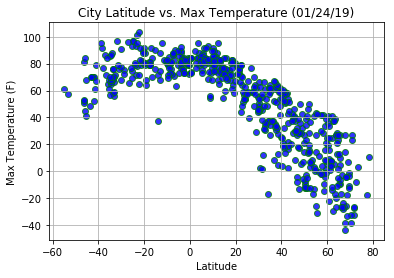

In [21]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
            max_temps,
            color="blue",
            edgecolor="green",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

#Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
#plt.savefig("output_data/Fig1.png")

#Show plot
plt.show()

#### Latitude vs. Humidity Plot

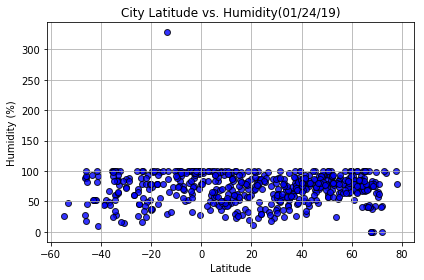

In [22]:
# Build the scatter plots for latitude vs. humidity plot
plt.scatter(lats,
            humidity,
            color="blue",
            edgecolor="black", 
            linewidths=1, 
            marker="o", 
            alpha = 0.8,
            label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Plot
#plt.savefig("fig1.png")

# Show Plot
plt.tight_layout()
plt.show()


#### Latitude vs. Cloudiness Plot

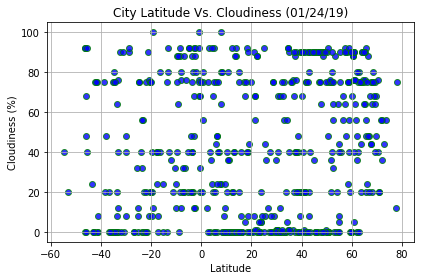

In [26]:
#Build the scatter plots for latitude vs. cloudiness plot
plt.scatter(lats,
            cloudiness,
            color="blue", 
            edgecolor="green", 
            linewidths=1, 
            marker="o", 
            alpha = 0.8,
            label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save Plot
#plt.savefig("fig2.png")

#Show Plot
plt.tight_layout()
plt.show()

#### Latitude vs. Wind Speed Plot

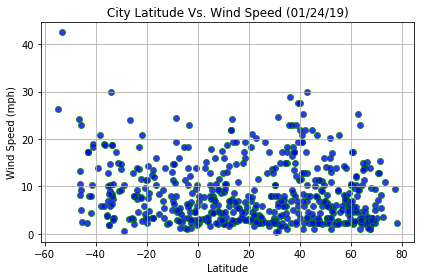

In [25]:
#Build the scatter plots for latitude vs. wind speed plot
plt.scatter(lats,
            wind_speed,
            color="blue",
            edgecolor="green",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

#Format Plot
plt.title("City Latitude Vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save
#plt.savefig("fig4.png")

#Show Plot
plt.tight_layout()
plt.show()
